In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
import numpy as np
import math
from sklearn import preprocessing

# Resource
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# https://www.kaggle.com/datasets/kandij/electric-production

# Time Series Analysis Code Snippet

This code snippet includes imports and resources for performing time series analysis and preprocessing for machine learning tasks. It leverages key Python libraries like `pandas`, `matplotlib`, `seaborn`, and `statsmodels`.

```python
import pandas as pd
from sklearn.model_selection import train_test_split

from dateutil.parser import parse
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime as dt
import numpy as np
import math
from sklearn import preprocessing

# Resource
# https://www.machinelearningplus.com/time-series/time-series-analysis-python/
# https://www.kaggle.com/datasets/kandij/electric-production


# Time Series Data Loading and Inspection

This section describes the steps to load a dataset, parse the date column, and inspect the first few rows to ensure data integrity.

## Key Steps:
1. Load the `Electric_Production.csv` file, ensuring the `DATE` column is parsed as a datetime object.
2. Verify the data type of the `DATE` column.
3. Display the first 10 rows of the dataset for an overview.

Make sure the dataset file is in the correct location or provide the appropriate file path.


In [48]:
df = pd.read_csv("Electric_Production.csv", parse_dates=['DATE'])

In [50]:
df['DATE'].dtypes

dtype('<M8[ns]')

In [52]:
df.head(10)

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
5,1985-06-01,58.0904
6,1985-07-01,62.6202
7,1985-08-01,63.2485
8,1985-09-01,60.5846
9,1985-10-01,56.3154


# Plotting the Initial Graph

This section describes the steps to visualize the data by plotting the `Value` column against the `DATE` column.

## Key Steps:
1. Set the x-axis as the `DATE` column and the y-axis as the `Value` column.
2. Adjust the figure size to make the plot more readable.
3. Use the `plt.plot()` function to create a line plot.
4. Display the plot using `plt.show()`.

This visualization helps in understanding the overall trend and patterns in the dataset.


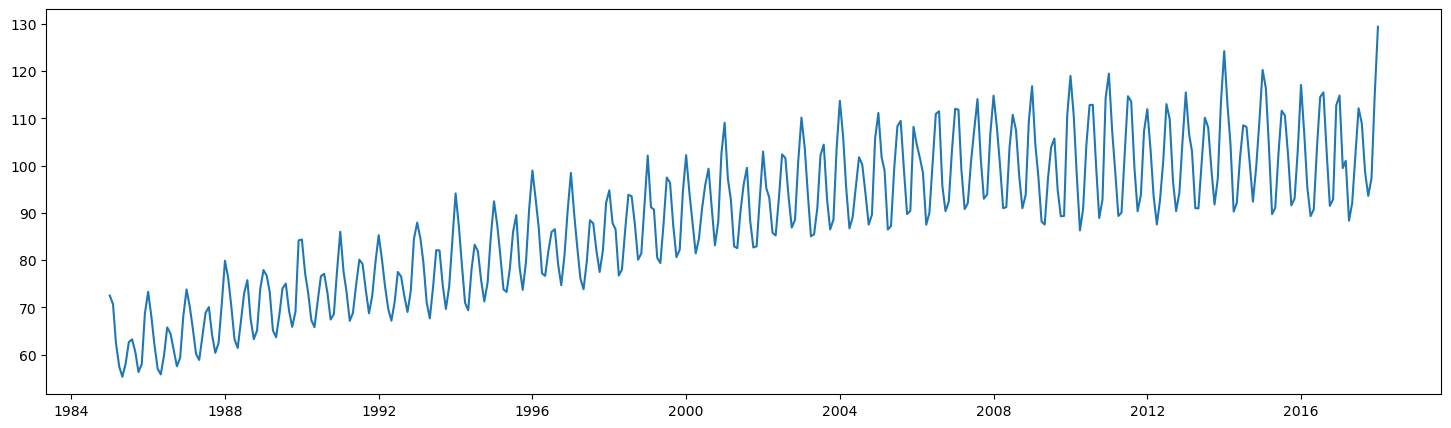

In [55]:
# Plot initial graph
x = df["DATE"]
y = df["Value"]
plt.rcParams["figure.figsize"] = (18,5)
plt.plot(x,y)
plt.show()

# Checking for Null Values and Statistical Summary

This section outlines the steps to inspect the dataset for any missing values and generate a statistical summary of the data.

## Key Steps:
1. **Check for Null Values**:
   - Use `df.isna().sum()` to identify any missing values in each column of the dataset.

2. **Statistical Summary**:
   - Use `df.describe()` to generate descriptive statistics, including count, mean, standard deviation, min, max, and quartiles for numerical columns.

These steps are essential for preliminary data exploration and ensuring data quality before further analysis.


In [58]:
# Check for nulls
df.isna().sum()

DATE     0
Value    0
dtype: int64

In [60]:
df.describe()

,DATE,Value
count,397,397.000000
mean,2001-07-01 13:25:14.357682560,88.847218
min,1985-01-01 00:00:00,55.315100
25%,1993-04-01 00:00:00,77.105200
50%,2001-07-01 00:00:00,89.779500
75%,2009-10-01 00:00:00,100.524400
max,2018-01-01 00:00:00,129.404800
std,NaN,15.387834


# Time Series Decomposition

This section describes the decomposition of the time series data into its components (trend, seasonality, and residuals) using both multiplicative and additive models.

## Key Steps:
1. **Load the Dataset with Index Column**:
   - Set the `DATE` column as the index while loading the dataset to facilitate time series analysis.

2. **Multiplicative Decomposition**:
   - Decompose the time series using a multiplicative model, which assumes the components multiply together to produce the observed data.

3. **Additive Decomposition**:
   - Decompose the time series using an additive model, which assumes the components add together to produce the observed data.

Decomposition helps in understanding the underlying structure and patterns in the time series data.


In [63]:
# Multiplicative Decomposition
df = pd.read_csv("Electric_Production.csv", parse_dates=['DATE'], index_col='DATE')

result_mul = seasonal_decompose(df['Value'], model='multiplicative', extrapolate_trend='freq')

In [65]:
# Additive Decomposition
result_add = seasonal_decompose(df['Value'], model='additive', extrapolate_trend='freq')

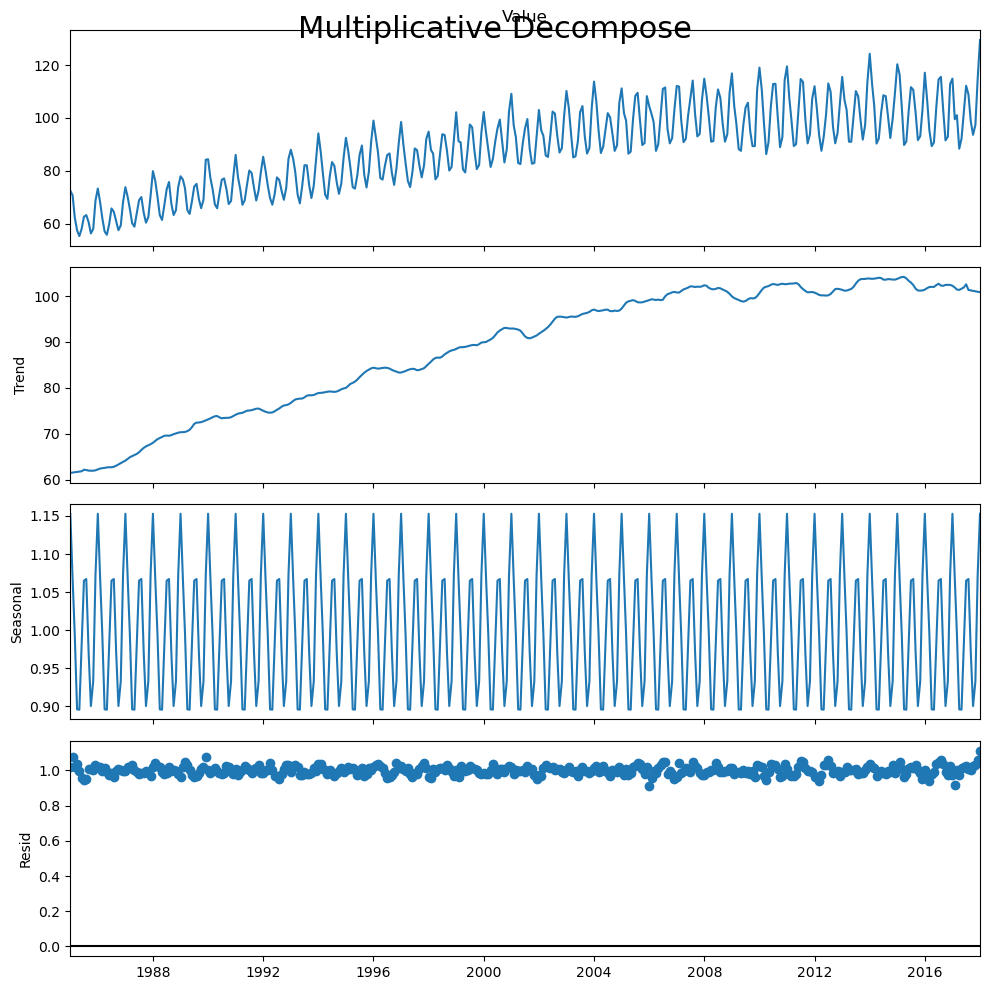

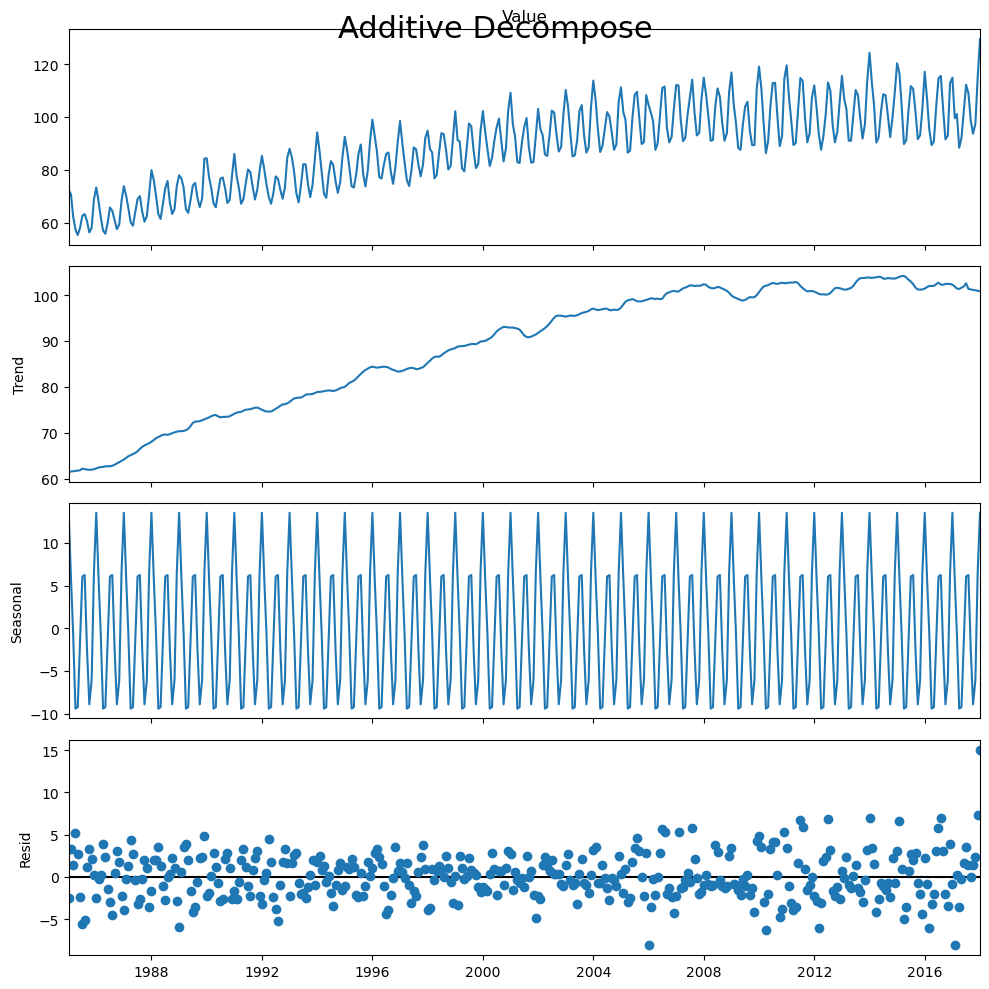

In [67]:
#Plot

plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)

result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Time Series Decomposition with Visualization

In this section, we perform time series decomposition on the dataset to analyze its underlying components: trend, seasonality, and residuals. Both multiplicative and additive models are visualized to explore the behavior of the time series.

## Key Steps:
1. **Multiplicative Decomposition**:
   - Assumes the observed data is the product of its components: 
     \[
     Observed = Trend \times Seasonal \times Residual
     \]
   - Highlights proportional changes in seasonality and residuals relative to the trend.

2. **Additive Decomposition**:
   - Assumes the observed data is the sum of its components:
     \[
     Observed = Trend + Seasonal + Residual
     \]
   - Useful when variations in seasonal and residual components are constant over time.

## Visualization:
### Multiplicative Decomposition
- The plot illustrates:
  - **Trend**: Gradual upward trend in electricity production over time.
  - **Seasonality**: Periodic fluctuations, indicating consistent seasonal patterns.
  - **Residuals**: Remaining noise after removing the trend and seasonality.

### Additive Decomposition
- The plot illustrates:
  - **Trend**: Similar upward trend as in the multiplicative model.
  - **Seasonality**: Fixed amplitude of periodic patterns over time.
  - **Residuals**: Constant variations around the zero line, representing noise.

### Plots
1. **Multiplicative Decomposition**:
   - Displays how components multiply to form the observed data.

2. **Additive Decomposition**:
   - Displays how components add to form the observed data.

In [70]:
# Extract Components
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
DATE,,,,
1985-01-01,1.152903,61.508657,1.022446,72.5052
1985-02-01,1.067341,61.577679,1.075279,70.6720
1985-03-01,0.995556,61.646701,1.017556,62.4502
1985-04-01,0.896242,61.715723,1.039036,57.4714
1985-05-01,0.895830,61.784745,0.999395,55.3151


# Extracting Decomposition Components and Reconstructing Actual Values

This step involves extracting the components from the multiplicative decomposition to analyze and understand the time series structure. The components include:

## Key Components:
1. **Seasonal Component**:
   - Captures the periodic fluctuations in the data, representing seasonality.

2. **Trend Component**:
   - Reflects the long-term upward or downward movement in the data.

3. **Residual Component**:
   - Accounts for irregular or random variations that remain after removing the trend and seasonal effects.

4. **Actual Values**:
   - The original observed data points in the time series.

### Reconstruction:
The actual values are reconstructed by combining the seasonal, trend, and residual components through multiplication. This ensures the decomposition process is accurate and aligns with the original dataset.

### Observations:
- The decomposition highlights the underlying structure of the time series, making it easier to identify trends and patterns.
- Reconstructing the actual values validates the decomposition process and helps ensure data integrity for further analysis.

This extracted information forms the foundation for more advanced time series forecasting and anomaly detection techniques.


In [73]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [75]:
# Model fit
model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=False)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# SARIMAX Model Fitting

In this step, we use the SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model to fit the time series data. SARIMAX is a powerful tool for modeling and forecasting time series data with both trend and seasonal components.

## Key Details:
1. **Model Specification**:
   - `order=(1, 1, 1)`: Specifies the ARIMA parameters:
     - Autoregressive (AR) term: 1
     - Differencing (I) term: 1
     - Moving Average (MA) term: 1
   - `seasonal_order=(1, 1, 1, 12)`: Specifies the seasonal ARIMA parameters:
     - Seasonal AR term: 1
     - Seasonal differencing term: 1
     - Seasonal MA term: 1
     - Seasonal period: 12 (e.g., monthly seasonality)

2. **Model Fitting**:
   - The SARIMAX model is fitted to the dataset to capture both non-seasonal and seasonal patterns.
   - The `disp=False` parameter suppresses convergence output during model fitting.

## Purpose:
The fitted model can be used for:
- Forecasting future values in the time series.
- Understanding relationships between trend, seasonality, and other components.

SARIMAX is particularly suitable for datasets with significant seasonal behavior, making it a versatile choice for time series analysis and forecasting.


In [78]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Value   No. Observations:                  397
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -888.613
Date:                            Fri, 29 Nov 2024   AIC                           1787.226
Time:                                    00:22:43   BIC                           1806.979
Sample:                                01-01-1985   HQIC                          1795.061
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5249      0.045     11.764      0.000       0.437       0.612
ma.L1         -0.9547      0.018    -54.378      0.000      -0.989      -0.920
ar.S.L12       0.0417      0.057      0.727      0.467      -0.071       0.154
ma.S.L12      -0.7688      0.045    -17.104      0.000      -0.857      -0.681
sigma2         5.8004      0.341     16.998      0.000       5.132       6.469
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                27.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# SARIMAX Model Summary

The SARIMAX model was fitted to the dataset with the following results:

## Model Details:
- Non-seasonal order: (1, 1, 1)
- Seasonal order: (1, 1, 1, 12)
- Observations: 397
- Log-Likelihood: -888.613
- AIC: 1787.226
- BIC: 1806.979

## Key Findings:
- Significant Parameters: 
  - `ar.L1`: 0.5249 (P < 0.05)
  - `ma.L1`: -0.9547 (P < 0.05)
  - `ma.S.L12`: -0.7688 (P < 0.05)
- Residuals show:
  - No significant autocorrelation (Ljung-Box P = 0.63)
  - Non-normality (Jarque-Bera P = 0.00)
  - Presence of heteroskedasticity (P = 0.00)

## Summary:
The model captures key trends and seasonality but may need adjustments for residual normality and variance stability.


In [81]:
# Create a list and append it with the predicted data
prediction = []
for i in range(12):
    yhat = model_fit.predict(len(df) + i-1)
    prediction.append([yhat.index[0], yhat[0]])
    print(yhat)

2018-01-01    120.38248
Freq: MS, dtype: float64
2018-02-01    114.01141
Freq: MS, dtype: float64
2018-03-01    105.122195
Freq: MS, dtype: float64
2018-04-01    92.714328
Freq: MS, dtype: float64
2018-05-01    94.159403
Freq: MS, dtype: float64
2018-06-01    104.621735
Freq: MS, dtype: float64
2018-07-01    113.861597
Freq: MS, dtype: float64
2018-08-01    112.608923
Freq: MS, dtype: float64
2018-09-01    101.93192
Freq: MS, dtype: float64
2018-10-01    93.997362
Freq: MS, dtype: float64
2018-11-01    97.271179
Freq: MS, dtype: float64
2018-12-01    112.651718
Freq: MS, dtype: float64


/var/folders/90/8c22sw7j58j259fp0gpmr7h40000gn/T/ipykernel_34553/2699470311.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction.append([yhat.index[0], yhat[0]])


In [83]:
yhat.index[0]

Timestamp('2018-12-01 00:00:00')

In [85]:
print(prediction)

[[Timestamp('2018-01-01 00:00:00'), 120.38247973991625], [Timestamp('2018-02-01 00:00:00'), 114.01141040717464], [Timestamp('2018-03-01 00:00:00'), 105.12219540360061], [Timestamp('2018-04-01 00:00:00'), 92.71432809732022], [Timestamp('2018-05-01 00:00:00'), 94.15940311445476], [Timestamp('2018-06-01 00:00:00'), 104.621734813075], [Timestamp('2018-07-01 00:00:00'), 113.86159733441758], [Timestamp('2018-08-01 00:00:00'), 112.60892328991464], [Timestamp('2018-09-01 00:00:00'), 101.93192015332599], [Timestamp('2018-10-01 00:00:00'), 93.99736202729981], [Timestamp('2018-11-01 00:00:00'), 97.27117886814652], [Timestamp('2018-12-01 00:00:00'), 112.65171833609816]]


# SARIMAX Model Predictions

The SARIMAX model was utilized to forecast the next 12 months based on the historical time series data.

## Key Steps:
1. **Forecasting**:
   - A loop was used to generate predictions for 12 future months.
   - Each forecast is generated step-by-step, capturing both seasonal and trend components.

2. **Output**:
   - The predictions provide a monthly forecast for the year 2018, capturing expected trends and seasonality.

## Use Case:
These predictions are valuable for:
- Planning and decision-making in scenarios reliant on monthly data trends.
- Evaluating how well the model performs by comparing actual data (if available) with forecasts.
- Understanding the model's ability to generalize seasonal and trend behaviors into the future.

This approach ensures a systematic prediction process with clear outputs aligned to the forecasting goals.


In [88]:
# Electric Production Prediction table for year 2018
df2 = pd.DataFrame(prediction, columns = ['DATE', 'Value'])
display(df2)

,DATE,Value
0,2018-01-01,120.382480
1,2018-02-01,114.011410
2,2018-03-01,105.122195
3,2018-04-01,92.714328
4,2018-05-01,94.159403
5,2018-06-01,104.621735
6,2018-07-01,113.861597
7,2018-08-01,112.608923
8,2018-09-01,101.931920
9,2018-10-01,93.997362


In [90]:
df2['DATE'].dtypes

dtype('<M8[ns]')

In [92]:
df = df.reset_index()
df

,DATE,Value
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151
...,...,...
392,2017-09-01,98.6154
393,2017-10-01,93.6137
394,2017-11-01,97.3359
395,2017-12-01,114.7212


# Electric Production Prediction for 2018

The SARIMAX model was used to forecast monthly electric production for the year 2018. The predictions were organized into a new DataFrame for further analysis and display.

## Steps:
1. **Prediction DataFrame Creation**:
   - A new DataFrame `df2` was created using the predicted `DATE` and `Value`.
   - The `DATE` column was verified to have a proper datetime format (`<M8[ns]`).

2. **Original Data Reset**:
   - The original dataset `df` was reset to include the index as a separate column for easy comparison with predictions.

## Use Case:
The predicted data can now be compared with historical trends or actual future values (if available) to validate model performance and identify patterns or deviations.

This approach provides a structured way to analyze the model's forecasting capabilities and aligns with planning or trend analysis objectives.


In [95]:
result = pd.concat([df, df2], ignore_index=True, axis = 0)

In [97]:
result

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608923
405,2018-09-01,101.931920
406,2018-10-01,93.997362
407,2018-11-01,97.271179


In [99]:
df_predicted = pd.DataFrame(data=result)
df_predicted

,DATE,Value
0,1985-01-01,72.505200
1,1985-02-01,70.672000
2,1985-03-01,62.450200
3,1985-04-01,57.471400
4,1985-05-01,55.315100
...,...,...
404,2018-08-01,112.608923
405,2018-09-01,101.931920
406,2018-10-01,93.997362
407,2018-11-01,97.271179


# Predicted Electric Production DataFrame

The `df_predicted` DataFrame contains 409 rows of historical and forecasted electric production data. It includes `DATE` and `Value` columns for easy comparison and analysis. This structure supports visualization and performance evaluation.


In [102]:
x2 = df2["DATE"]
y2 = df2["Value"]

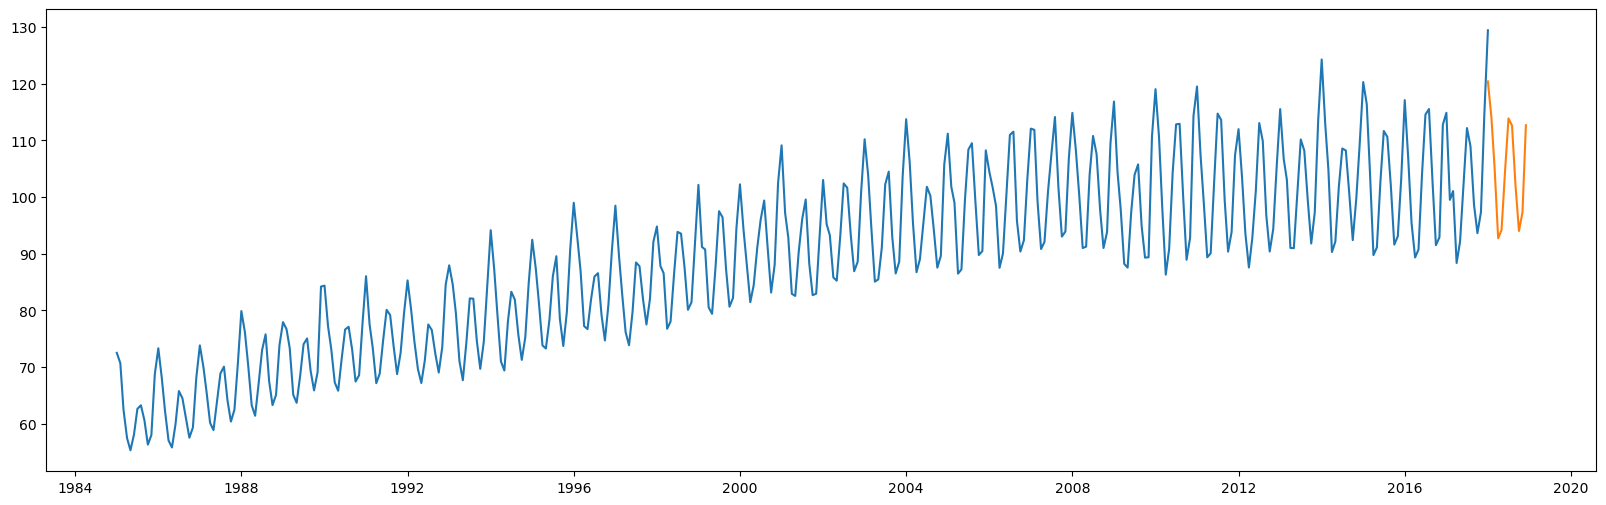

In [104]:
# Final Prediction Graph
#Predicted part colored in orange
plt.rcParams["figure.figsize"] = (20,6)
plt.plot(x,y)
plt.plot(x2,y2)

# Final Prediction Graph

The final graph displays the observed and predicted electric production values:
- **Blue Line**: Historical data (observed values).
- **Orange Line**: Predicted values for the year 2018, based on the SARIMAX model.

The visualization clearly shows the continuation of trends and seasonality in the forecasted period, providing insights into future electricity production patterns.


# Electric Production Time Series Analysis and Prediction

## Project Overview:
This project involves analyzing historical electric production data and forecasting future values using time series modeling techniques. The SARIMAX model was employed to account for both seasonal and trend components in the data.

## Key Steps:
1. **Data Exploration**:
   - Visualized historical data trends and seasonality.
   - Decomposed the data into trend, seasonal, and residual components.

2. **Modeling**:
   - Built and fitted a SARIMAX model with specified non-seasonal and seasonal parameters.
   - Validated model performance using diagnostic plots and statistical metrics.

3. **Forecasting**:
   - Generated monthly predictions for the year 2018.
   - Visualized the predicted values alongside historical data.

## Observations:
- The data exhibits strong seasonal patterns with a clear upward trend over the years.
- The SARIMAX model effectively captured these patterns, as seen in the smooth transition between observed and predicted values.
- Some residual irregularities may indicate external factors affecting electricity production, such as socio-economic or climatic changes.

## Implications:
- **Energy Planning**: These forecasts can aid policymakers and energy companies in planning for future demand and production adjustments.
- **Socio-economic Impact**: Variations in electricity production could be linked to population growth, industrial activities, or policy changes.
- **Environmental Considerations**: The upward trend highlights the growing need for sustainable energy solutions to meet increasing demand.

## Conclusion:
The project demonstrates the utility of time series models like SARIMAX for forecasting purposes. The insights derived from this analysis can support strategic decision-making in the energy sector, ensuring a balance between demand and production while considering socio-economic and environmental impacts.


# Thank You! 😊